In [2]:
# data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
# data-lab-3-insurance
# data-lab-4-heart
# data-lab-5-hcv
# data-lab-6-ckd-courseproject
# data.info()

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(style='dark', palette='muted', color_codes=True)
import plotly.express as px
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [4]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, confusion_matrix, accuracy_score 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

In [5]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-4-heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
mis_col = data.isna().sum() * 100/len(data)

mis_col.sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [7]:
data.duplicated().sum()

data.drop_duplicates(keep='first', subset=None, inplace=True, ignore_index=False)
data.duplicated().sum()

0

<AxesSubplot:title={'center':'Correlation Matrix'}>

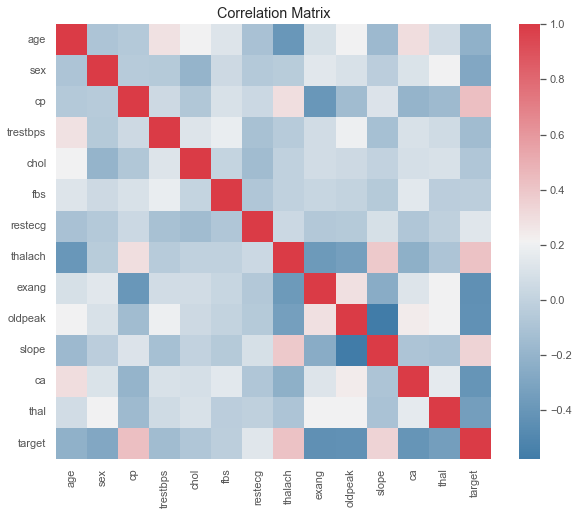

In [8]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), ax=ax, square=True)

In [9]:
y = data.target

x = data.drop(columns=['target'])


In [10]:
num_val = ['age','trestbps','chol','thalach','oldpeak' ]
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [11]:
col_transf = ColumnTransformer( 
    [ 
        ('num', StandardScaler(), num_val),
        ('cat', OrdinalEncoder(), cat_val)
    ]
)

x = pd.DataFrame(col_transf.fit_transform(x))
x.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1.0,0.0,1.0,1.0,1.0,1.0,3.0
301,0.285561,-0.091401,-0.203222,1.068439,-0.899544,0.0,1.0,0.0,0.0,1.0,1.0,2.0


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)


In [13]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_true = y_test

y_pred = logreg.predict(x_test)



In [14]:
accu_scr = accuracy_score(y_true,y_pred)

modperf = pd.DataFrame( [
    'LogisticRegression', accu_scr

]
    
).transpose()

modperf.columns = ['Method', 'Accu Score']

modperf

,Method,Accu Score
0,LogisticRegression,0.824176


<AxesSubplot:xlabel='Predicted Values', ylabel='True Values'>

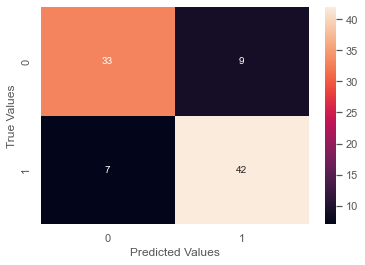

In [15]:
conmat_dic = { 
    'y_true': y_true,
    'y_pred':y_pred
}

conmat_col = pd.DataFrame( 
    conmat_dic, columns=['y_true', 'y_pred']
)

confusion_matrix = pd.crosstab(conmat_col['y_true'], conmat_col['y_pred'], rownames=['True Values'], colnames=['Predicted Values'])

sns.heatmap(confusion_matrix, annot=True)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

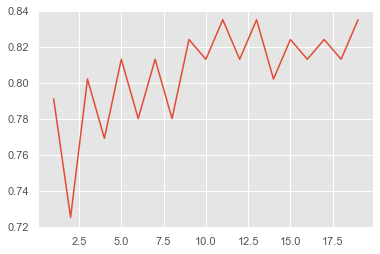

In [16]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)

    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_true,y_pred)

    accuracies.append(accu)

accuracies = np.array(accuracies)

sns.lineplot(np.arange(1,20),accuracies)

In [17]:
best_k = np.argmax(accuracies)
best_accu = np.max(accuracies)

mod_accu = pd.DataFrame( 
    [ 
        'KNeighborsClassifier', best_k, best_accu
    ]
).transpose()

mod_accu.columns = ['Method', 'Best K', 'Best Accuracy']

mod_accu

,Method,Best K,Best Accuracy
0,KNeighborsClassifier,10,0.835165
